Adding white noise channels or all-zeros channel to MNIST

In [7]:
from keras.datasets import mnist

import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images),784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

In [8]:
from tensorflow import keras 
from keras import layers
  
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
  
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
  
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 11ms/step - loss: 0.6175 - accuracy: 0.8127 - val_loss: 0.2588 - val_accuracy: 0.9252
Epoch 2/10
375/375 [==============================] - 4s 9ms/step - loss: 0.2509 - accuracy: 0.9225 - val_loss: 0.1730 - val_accuracy: 0.9491
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1604 - accuracy: 0.9500 - val_loss: 0.1493 - val_accuracy: 0.9553
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.1164 - accuracy: 0.9629 - val_loss: 0.1580 - val_accuracy: 0.9554
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0865 - accuracy: 0.9727 - val_loss: 0.1732 - val_accuracy: 0.9485
Epoch 6/10
375/375 [==============================] - 4s 9ms/step - loss: 0.0640 - accuracy: 0.9792 - val_loss: 0.1494 - val_accuracy: 0.9557
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.1659 - val_accuracy: 0.9536
Epoch

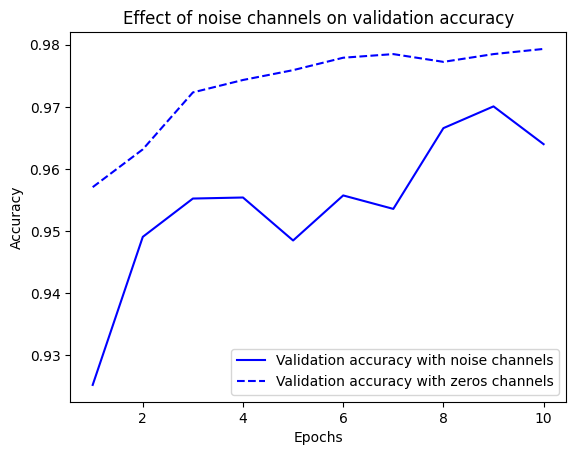

In [9]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

Noisy features lead to overfitting